# Model

In [1]:
%matplotlib inline
import pandas as pd
import pysd

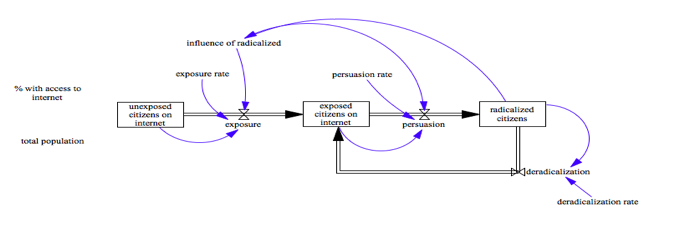

In [2]:
from IPython.display import Image
Image(filename='Radicalization.png')

In [3]:
PySD_model = pysd.read_vensim('ASD.mdl')

def RunASDModel(persuasion_rate=0.05, deradicalization_rate=0.02):
    SD_result = PySD_model.run(params={
                            'persuasion rate':persuasion_rate,
                            'deradicalization rate':deradicalization_rate
                                       })
    time = SD_result.index.values
    return SD_result['radicalized citizens']

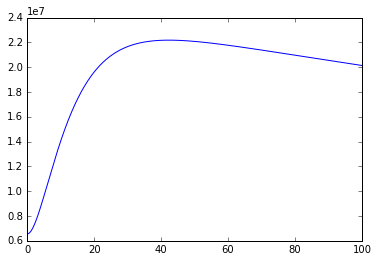

In [4]:
result = RunASDModel(0.05, 0.002)
result.plot()

In [5]:
worldbank_data = pd.read_csv('Internet_data.csv', sep=',' ) # , index_col=0)

In [6]:
worldbank_data.columns

Index(['﻿Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2015 [YR2015]'],
      dtype='object')

In [7]:
# worldbank_data['Series Name']

# Load In Data

In [8]:
# only if the previous cell did not work, try this:

worldbank_data['\ufeffSeries Name'] 

worldbank_data.rename(columns={'\ufeffSeries Name':'Series Name'},inplace=True)

In [9]:
# all internet users by World Bank

internet_users_data = worldbank_data[worldbank_data['Series Name'].notnull() & (worldbank_data['Series Name']=='Internet users (per 100 people)') ]
internet_users_data.head()

,Series Name,Series Code,Country Name,Country Code,2015 [YR2015]
2376,Internet users (per 100 people),IT.NET.USER.P2,India,IND,26
2377,Internet users (per 100 people),IT.NET.USER.P2,Bangladesh,BGD,14.4
2378,Internet users (per 100 people),IT.NET.USER.P2,Pakistan,PAK,18
2379,Internet users (per 100 people),IT.NET.USER.P2,Mexico,MEX,57.4310429923633
2380,Internet users (per 100 people),IT.NET.USER.P2,Vietnam,VNM,52.720000000055


In [10]:
internet_users = pd.DataFrame(internet_users_data.ix[:,2:])
internet_users.rename(columns={'2015 [YR2015]':'Percentage Internet Users'},inplace=True)
internet_users.head()

,Country Name,Country Code,Percentage Internet Users
2376,India,IND,26
2377,Bangladesh,BGD,14.4
2378,Pakistan,PAK,18
2379,Mexico,MEX,57.4310429923633
2380,Vietnam,VNM,52.720000000055


In [11]:
# all internet users by World Bank

population_data = worldbank_data[worldbank_data['Series Code'].notnull() & (worldbank_data['Series Code']=='SP.POP.TOTL') ]
population_data.head()

,Series Name,Series Code,Country Name,Country Code,2015 [YR2015]
4488,"Population, total",SP.POP.TOTL,India,IND,1311050527
4489,"Population, total",SP.POP.TOTL,Bangladesh,BGD,160995642
4490,"Population, total",SP.POP.TOTL,Pakistan,PAK,188924874
4491,"Population, total",SP.POP.TOTL,Mexico,MEX,127017224
4492,"Population, total",SP.POP.TOTL,Vietnam,VNM,91703800


In [12]:
population = pd.DataFrame(population_data.ix[:,2:])
population.rename(columns={'2015 [YR2015]':'Total Population'},inplace=True)
population.head()

,Country Name,Country Code,Total Population
4488,India,IND,1311050527
4489,Bangladesh,BGD,160995642
4490,Pakistan,PAK,188924874
4491,Mexico,MEX,127017224
4492,Vietnam,VNM,91703800


In [29]:
European_countries = ['CHE','GBR','NLD','SWE','DEU']

i_p_data= internet_users.merge(population,how='inner', on=['Country Code','Country Name'])
i_p_Europe = i_p_data[i_p_data['Country Code'].isin (European_countries)]

In [30]:
i_p_Europe.head()

,Country Name,Country Code,Percentage Internet Users,Total Population
113,Germany,DEU,87.5898,81413145
185,Netherlands,NLD,93.0965,16936520
236,Sweden,SWE,90.6102,9798871
237,Switzerland,CHE,87.97,8286976
251,United Kingdom,GBR,92.0003,65138232


# Run Model

In [31]:
def RunASDModel(row):
    SD_result = PySD_model.run(params={
                            "with access to internet": float(row['Percentage Internet Users']) /100,
                            "total population": int(row['Total Population'])
                                       })
    time = SD_result.index.values
    return SD_result['unexposed citizens on internet']

In [32]:
# only working with the European countries

sim_results = i_p_Europe.apply(RunASDModel,axis=1)

In [33]:
sim_results

,0.0,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,...,99.4375,99.5,99.5625,99.625,99.6875,99.75,99.8125,99.875,99.9375,100.0
113,7.130961e+07,7.086393e+07,7.042103e+07,6.998089e+07,6.954351e+07,6.910887e+07,6.867694e+07,6.824771e+07,6.782116e+07,6.739728e+07,...,3319.559481,3298.812234,3278.194658,3257.705941,3237.345279,3217.111871,3197.004922,3177.023641,3157.167243,3137.434948
185,1.576731e+07,1.566876e+07,1.557083e+07,1.547351e+07,1.537680e+07,1.528070e+07,1.518520e+07,1.509029e+07,1.499597e+07,1.490225e+07,...,733.989625,729.402190,724.843427,720.313155,715.811198,711.337378,706.891519,702.473447,698.082988,693.719970
236,8.878777e+06,8.823284e+06,8.768139e+06,8.713338e+06,8.658880e+06,8.604762e+06,8.550982e+06,8.497538e+06,8.444428e+06,8.391651e+06,...,413.319140,410.735896,408.168797,405.617742,403.082631,400.563364,398.059843,395.571969,393.099644,390.642772
237,7.290053e+06,7.244490e+06,7.199212e+06,7.154217e+06,7.109503e+06,7.065069e+06,7.020912e+06,6.977031e+06,6.933425e+06,6.890091e+06,...,339.361883,337.240872,335.133116,333.038534,330.957043,328.888562,326.833008,324.790302,322.760363,320.743110
251,5.992737e+07,5.955282e+07,5.918062e+07,5.881074e+07,5.844317e+07,5.807790e+07,5.771491e+07,5.735420e+07,5.699573e+07,5.663951e+07,...,2789.700617,2772.264988,2754.938332,2737.719967,2720.609217,2703.605410,2686.707876,2669.915952,2653.228977,2636.646296


In [34]:
country_results = pd.concat([i_p_Europe,sim_results], axis=1)  
country_results.head()

,Country Name,Country Code,Percentage Internet Users,Total Population,0.0,0.0625,0.125,0.1875,0.25,0.3125,...,99.4375,99.5,99.5625,99.625,99.6875,99.75,99.8125,99.875,99.9375,100.0
113,Germany,DEU,87.5898,81413145,7.130961e+07,7.086393e+07,7.042103e+07,6.998089e+07,6.954351e+07,6.910887e+07,...,3319.559481,3298.812234,3278.194658,3257.705941,3237.345279,3217.111871,3197.004922,3177.023641,3157.167243,3137.434948
185,Netherlands,NLD,93.0965,16936520,1.576731e+07,1.566876e+07,1.557083e+07,1.547351e+07,1.537680e+07,1.528070e+07,...,733.989625,729.402190,724.843427,720.313155,715.811198,711.337378,706.891519,702.473447,698.082988,693.719970
236,Sweden,SWE,90.6102,9798871,8.878777e+06,8.823284e+06,8.768139e+06,8.713338e+06,8.658880e+06,8.604762e+06,...,413.319140,410.735896,408.168797,405.617742,403.082631,400.563364,398.059843,395.571969,393.099644,390.642772
237,Switzerland,CHE,87.97,8286976,7.290053e+06,7.244490e+06,7.199212e+06,7.154217e+06,7.109503e+06,7.065069e+06,...,339.361883,337.240872,335.133116,333.038534,330.957043,328.888562,326.833008,324.790302,322.760363,320.743110
251,United Kingdom,GBR,92.0003,65138232,5.992737e+07,5.955282e+07,5.918062e+07,5.881074e+07,5.844317e+07,5.807790e+07,...,2789.700617,2772.264988,2754.938332,2737.719967,2720.609217,2703.605410,2686.707876,2669.915952,2653.228977,2636.646296


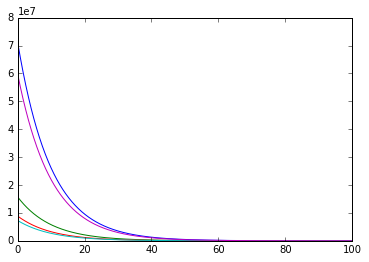

In [35]:
sim_results_transposed = pd.DataFrame(sim_results).T
sim_results_transposed.plot(legend=False)

# Geospatial

In [36]:
import geopandas as gp

In [37]:
shapefile = r'preprocessed_data/geo_df_EU.shp'
geo_data = gp.GeoDataFrame.from_file(shapefile).ix[:,0:2]
geo_data.head(5)

,country,geometry
0,Albania,"POLYGON ((20.59024743010491 41.85540416113361,..."
1,Austria,"POLYGON ((16.97966678230404 48.12349701597631,..."
2,Belgium,"POLYGON ((3.314971144228537 51.34578095153609,..."
3,Bulgaria,"POLYGON ((22.65714969248299 44.23492300066128,..."
4,Bosnia and Herzegovina,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [38]:
geo_data_merged = pd.merge(country_results, geo_data,left_on='Country Name',right_on='country')
geo_data_merged.head()

,Country Name,Country Code,Percentage Internet Users,Total Population,0.0,0.0625,0.125,0.1875,0.25,0.3125,...,99.5625,99.625,99.6875,99.75,99.8125,99.875,99.9375,100.0,country,geometry
0,Germany,DEU,87.5898,81413145,7.130961e+07,7.086393e+07,7.042103e+07,6.998089e+07,6.954351e+07,6.910887e+07,...,3278.194658,3257.705941,3237.345279,3217.111871,3197.004922,3177.023641,3157.167243,3137.434948,Germany,"POLYGON ((9.921906365609232 54.98310415304803,..."
1,Netherlands,NLD,93.0965,16936520,1.576731e+07,1.566876e+07,1.557083e+07,1.547351e+07,1.537680e+07,1.528070e+07,...,724.843427,720.313155,715.811198,711.337378,706.891519,702.473447,698.082988,693.719970,Netherlands,"POLYGON ((6.074182570020923 53.51040334737814,..."
2,Sweden,SWE,90.6102,9798871,8.878777e+06,8.823284e+06,8.768139e+06,8.713338e+06,8.658880e+06,8.604762e+06,...,408.168797,405.617742,403.082631,400.563364,398.059843,395.571969,393.099644,390.642772,Sweden,"POLYGON ((22.18317345550193 65.72374054632017,..."
3,Switzerland,CHE,87.97,8286976,7.290053e+06,7.244490e+06,7.199212e+06,7.154217e+06,7.109503e+06,7.065069e+06,...,335.133116,333.038534,330.957043,328.888562,326.833008,324.790302,322.760363,320.743110,Switzerland,"POLYGON ((9.59422610844635 47.52505809182027, ..."
4,United Kingdom,GBR,92.0003,65138232,5.992737e+07,5.955282e+07,5.918062e+07,5.881074e+07,5.844317e+07,5.807790e+07,...,2754.938332,2737.719967,2720.609217,2703.605410,2686.707876,2669.915952,2653.228977,2636.646296,United Kingdom,(POLYGON ((-5.661948614921897 54.5546031764838...


In [39]:
converted_geo_data=gp.GeoDataFrame (geo_data_merged)

In [40]:
import matplotlib.pyplot as plt

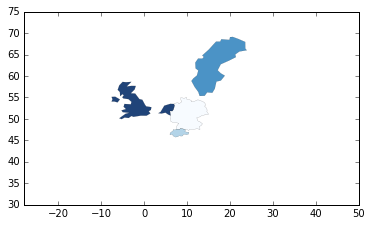

In [41]:
converted_geo_data.plot(column='Percentage Internet Users', scheme='fisher_jenks', alpha=0.9, k=4, linewidth=0.1,
             cmap=plt.cm.Blues, legend=False)
plt.xlim([-28, 50])
plt.ylim([30, 75])
plt.show()

In [42]:
import matplotlib as mpl
from ipywidgets import interact, FloatSlider, IntSlider,RadioButtons, Dropdown
sim_time = 100
slider_time = IntSlider(description = 'Time Select',
                        min=0, max=sim_time-1, value=1)

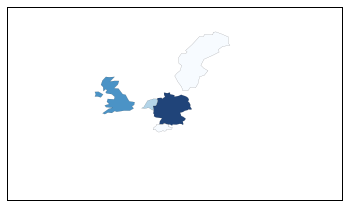

In [43]:
@interact( time = slider_time) # Scenario = select_scenario,
def update_map(time): # Scenario
    ax = converted_geo_data.plot(column=time, scheme='fisher_jenks', alpha=0.9, k=4, linewidth=0.1,
             cmap=plt.cm.Blues, legend=False)
    plt.xlim(-28, 50)
    plt.ylim(30, 75)
    plt.xticks([])
    plt.yticks([])